In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime
import numpy as np
from graphviz import Source

In [3]:
chan_feature_file = "/home/liubinxu/work/finance_learning/test/516000.feature_chan.all.json"
# chan_feature_file = "/home/liubinxu/finance/chan.py/feature.libsvm.json"

In [4]:
feature_list = []
with open(chan_feature_file) as f:
    for line in f:
        cols = line.strip().split("\t")
        fea_dict = json.loads(cols[-1])
        fea_dict["time"] = cols[0]
        fea_dict["label"] = cols[1]
        feature_list.append(fea_dict)

In [5]:
chan_feature_df = pd.DataFrame(feature_list)

In [14]:
chan_feature_df["time"]

0      2021/06/30 09:45
1      2021/07/01 11:15
2      2021/07/02 10:20
3      2021/07/02 11:15
4      2021/07/02 14:00
             ...       
849    2024/02/02 13:20
850    2024/02/02 14:30
851    2024/02/05 11:00
852    2024/02/06 09:50
853    2024/02/06 13:05
Name: time, Length: 854, dtype: object

In [6]:
a1 = cols[-1]

In [7]:
X_drop_list = ["now_seg", "last_seg", "now_segseg", "last_segseg", "now_segzs", "last_segzs", "now_seg_segzs", "last_seg_segzs"]
X_drop_list += ["time", "label"]

X_contain = [c for c in chan_feature_df.columns if c not in X_drop_list]

In [100]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# 加载 iris 数据集
# iris = load_iris()
# X = iris.data
# y = iris.target

# 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train = chan_feature_df[chan_feature_df["time"] <="2023"]
test = chan_feature_df[chan_feature_df["time"] >"2023"]
# X_train = train
y_train = train["label"]
X_train = train[X_contain]
y_train[y_train=="1low"] = 3
y_train[y_train=="1high"] = 1
y_train[y_train=="2low"] = 4
y_train[y_train=="2high"] = 2
y_train[y_train=="0"] = 0

y_test = test["label"]
X_test = test[X_contain]

y_test[y_test=="1low"] = 3
y_test[y_test=="1high"] = 1
y_test[y_test=="2low"] = 4
y_test[y_test=="2high"] = 2
y_test[y_test=="0"] = 0

# dtrain = xgb.DMatrix(X_train, label=y_train)

# # 训练 XGBoost 模型
# params = {'objective': 'multi:softmax',
#           "num_class": 5,
#           "enable_categorical": True,
#           'eval_metric': 'logloss',
#           'eta': 0.3,
#           'max_depth': 6,
#           'silent': 1,
#           'nthread': 4}
# num_round = 100
# model = xgb.train(params, dtrain, num_round)

xgb_clf = xgb.XGBClassifier(objective='multi:softprob', num_class=5)
xgb_clf.fit(X_train, y_train)

# dot_data = xgb.to_graphviz(xgb_clf, num_trees=0)
# Source(dot_data).render("tree", format="png")
# xgb_model = xgb.XGBClassifier()
# xgb_model.fit(X_train, y_train)


/home/liubinxu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/liubinxu/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/home/liubinxu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/liubinxu/miniconda3/

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=5, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = {

    'learning_rate': [0.01, 0.1, 0.3],  # 学习率

}

# 5. 初始化 GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid, 
                           scoring='accuracy')


In [131]:
grid_search.fit(np.array(X_train), list(y_train))

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                       

In [102]:
xgb_clf.score(np.array(X_train), y_train.ravel())

ValueError: Classification metrics can't handle a mix of unknown and multiclass targets

In [127]:
y_pred = xgb_clf.predict(X_train)

In [105]:
from sklearn.metrics import accuracy_score

In [126]:
accuracy_score(y_pred, list(y_train))

1.0

In [128]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [130]:
y_train.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [123]:
y_train.values.reshape(1,-1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3,
        3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [99]:
y_train.unique()

array([0, 1], dtype=object)

In [79]:
np.array(X_train)

array([[0.88888889, 0.009     , 0.008     , ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan, 0.00389105,
        0.006     ],
       [       nan,        nan,        nan, ...,        nan, 0.00389105,
        0.007     ],
       [       nan,        nan,        nan, ...,        nan, 0.00389105,
        0.008     ]])

In [26]:
dot_data = xgb.to_graphviz(xgb_clf, num_trees=0)
# Source(dot_data).render("tree", format="png")

In [14]:
dot_data.render("tree", forat="pdf")

'tree.pdf'

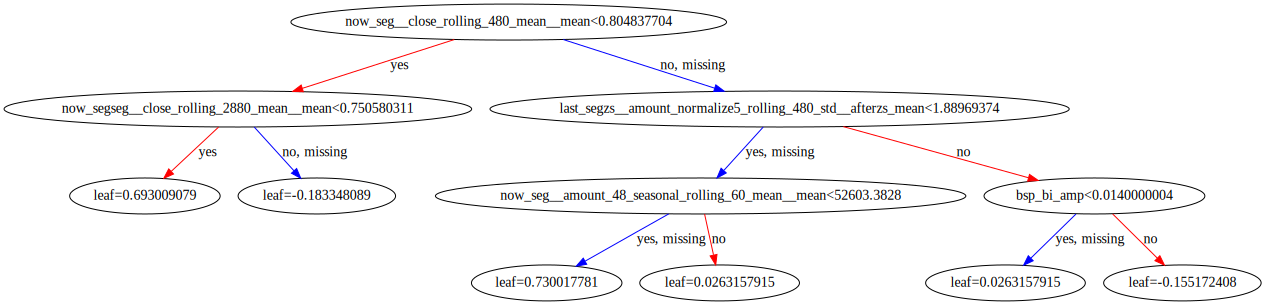

In [27]:
dot_data

In [12]:
xgb_clf.save_model("xgb.model.json")

In [16]:
with open("xgb.model.json", "r") as f, open("xgb.model.dump.json", "w") as g:
    g.write(json.dumps(json.load(f), indent=4))

In [31]:

# 预测测试集
y_pred = xgb_clf.predict(X_test)

# # 评估模型
accuracy = accuracy_score(list(y_test), y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5548098434004475


In [33]:
y_pred[:5]

array([3, 3, 3, 3, 3])

In [59]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加载数据
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 转换为 XGBoost 数据格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 设置 XGBoost 参数
params = {
    'objective': 'multi:softprob',  # 多分类问题，输出类别概率
    'num_class': 5,                # 类别数
    'max_depth': 4,                # 树的最大深度
    'eta': 0.3,                    # 学习率
    'eval_metric': 'mlogloss',     # 使用log损失作为评价指标
}

# 训练模型
num_round = 50  # 决策树的数量（即迭代次数）
bst = xgb.train(params, dtrain, num_boost_round=num_round)

# 预测 (概率分布)
y_pred_prob = bst.predict(dtest)

# 查看每个样本属于各个类别的概率
print("Predicted probabilities for the first 5 samples:\n", y_pred_prob[:5])

# 如果你想要转化为预测的类别标签
y_pred = y_pred_prob.argmax(axis=1)

# 计算准确率
accuracy = accuracy_score(list(y_test), y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Predicted probabilities for the first 5 samples:
 [[0.05922173 0.04202693 0.01915927 0.86157465 0.01801745]
 [0.05956746 0.03643433 0.01927112 0.86660445 0.01812263]
 [0.06596623 0.04034813 0.02134124 0.852275   0.02006938]
 [0.05956746 0.03643433 0.01927112 0.86660445 0.01812263]
 [0.05956746 0.03643433 0.01927112 0.86660445 0.01812263]]
Accuracy: 56.38%


In [83]:
bst.score(X_train, y_train)

AttributeError: 'Booster' object has no attribute 'score'

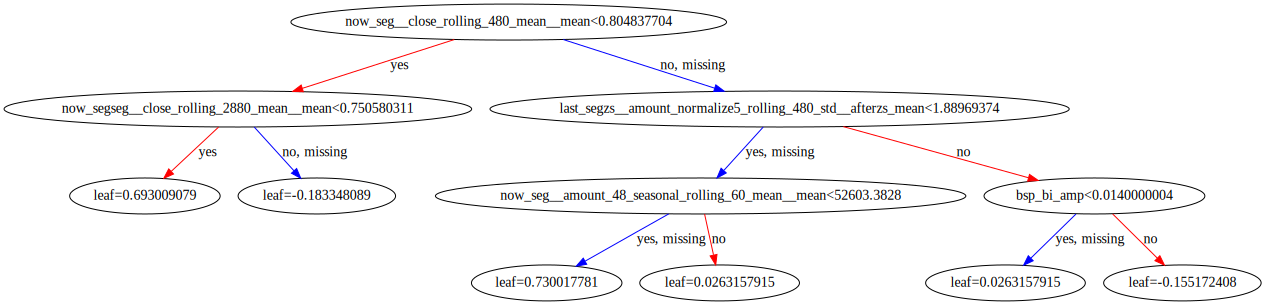

In [40]:
dot_data2 = xgb.to_graphviz(bst, num_trees=0)
dot_data2

In [44]:
accuracy = accuracy_score(list(y_test), y_pred)

In [45]:
accuracy

0.5637583892617449

In [47]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [55]:
X_train.ravel()

AttributeError: 'DataFrame' object has no attribute 'ravel'

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# 加载数据集（iris是一个多分类数据集）
data = load_iris()
X, y = data.data, data.target

# 定义模型
rf = RandomForestClassifier()

# 设置参数网格
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# 初始化 GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# 进行网格搜索
grid_search.fit(X, y)

# 输出最优参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳模型进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

# 输出分类报告
print(classification_report(y, y_pred))


Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        50
           2       0.96      1.00      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [124]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])